# Data 607  &mdash; Assignment 3

## Instructions
**Submit a pdf of your .ipynb file to the appropriate D2L dropbox by the due date provided in the course schedule. 
To convert to pdf: File -> Download as HTML. Then you can do Print to PDF to save it as pdf file. Please make sure to add appropriate comments, conclusions and run all cells before converting to pdf format. 

## 1. Can regularizing the linear model help?

In this exercise, we attempt to predict life expectance. Please find the data("LifeExpectancyData.csv") from D2L.

1. Implement the following:
   For `i` from 1 to 10000:

   - Construct a boostrap replicate `(X_tr, y_tr)` of the dataset `(X, y)`.
   - Form the complementary testing set `(X_te, y_te)` consisting of all elements of the original dataset that don't belong the bootstrap replicate.
   - Standardize `X_tr` and `X_te` using `StandardScaler`.
   - Fit
     1. A linear regression model, and
     2. A ridge regression model with parameter $\alpha=1.0$

     to the data. Record the the MSE on `(X_te, y_te)`.

2. On the same axes, plot the distributions (histograms) of the test MSES for the linear regression model and for the ridge regression model. Compute the means and standard deviations of these distributions. Indicate the means on your plot.

3. Use an appropriate statistical test to test the null hypothesis *the means of the two MSE disributions are the same*. Summarize: Is ridge regression an improvement on linear regression for this dataset?


In [1]:
import pandas as pd
import numpy as np
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
le = pd.read_csv("LifeExpectancyData.csv")
le = le.dropna()
le.head(2)

,Country,Year,Status,Lifeexpectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0


In [3]:
y = le['Lifeexpectancy ']
label_encoder_country = LabelEncoder()
label_encoder_status = LabelEncoder()
le['Country'] = label_encoder_country.fit_transform(le['Country'])
le['Status'] = label_encoder_country.fit_transform(le['Status'])

In [4]:
# Get the column names for X and Y values
X = le.drop(columns=['Lifeexpectancy '])
y = le['Lifeexpectancy ']

In [6]:
mse_lin = []
mse_ridge = []
for i in range(10000):
    #Training Data
    X_tr, y_tr = resample(X, y, replace=True)

    # Test Data
    X_te = X[~X.index.isin(X_tr.index)]
    y_te = y[~y.index.isin(y_tr.index)]

    # Standardized Data
    scaler = StandardScaler()
    X_tr = scaler.fit_transform(X_tr)
    X_te = scaler.transform(X_te)

    #Lin Reg
    linear_regression = LinearRegression()
    linear_regression.fit(X_tr, y_tr)
    y_pred_lin = linear_regression.predict(X_te)
    mse_lin.append(mean_squared_error(y_te, y_pred_lin))

    #Ridge Reg
    ridge_regression = Ridge(alpha=1.0)
    ridge_regression.fit(X_tr, y_tr)
    y_pred_ridge = ridge_regression.predict(X_te)
    mse_ridge.append(mean_squared_error(y_te, y_pred_ridge))

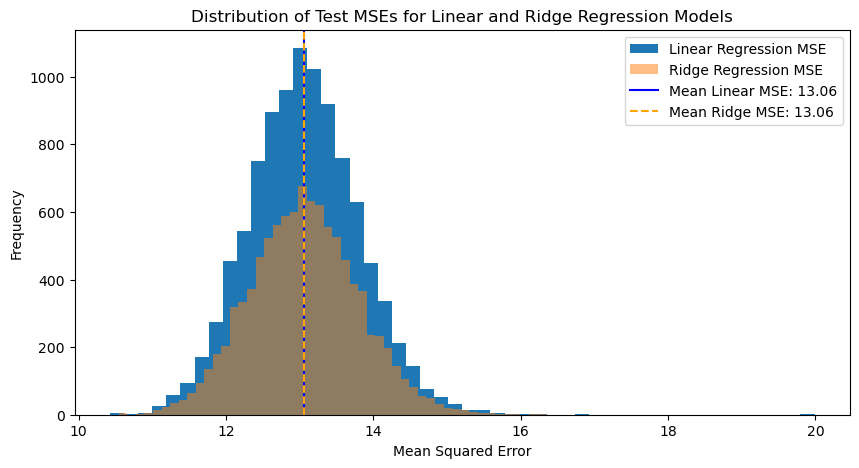

In [8]:
import matplotlib.pyplot as plt

#Plot of mse
plt.figure(figsize=(10, 5))
plt.hist(mse_lin, bins=50, alpha=1, label='Linear Regression MSE')
plt.hist(mse_ridge, bins=50, alpha=0.5, label='Ridge Regression MSE')

#Stats of mse
mean_mse_linear = np.mean(mse_lin)
std_mse_linear = np.std(mse_lin)
mean_mse_ridge = np.mean(mse_ridge)
std_mse_ridge = np.std(mse_ridge)

#Plot of Means
plt.axvline(mean_mse_linear, color='blue', linestyle='solid',label=f'Mean Linear MSE: {mean_mse_linear:.2f}')
plt.axvline(mean_mse_ridge, color='orange', linestyle='dashed',label=f'Mean Ridge MSE: {mean_mse_ridge:.2f}')

# Plot accessories
plt.xlabel('Mean Squared Error')
plt.ylabel('Frequency')
plt.title('Distribution of Test MSEs for Linear and Ridge Regression Models')
plt.legend()
plt.show()

In [10]:
# Testing the null that 2 means are the same
# Two groups so we will use t-test, samples are from the same bootstrap so we will use paired t-test
# 95% confidence level, null hypothesis: that two related or repeated samples have identical average values.
from scipy.stats import ttest_rel

t_stat, p_value = ttest_rel(mse_ridge, mse_lin)
print(f'With a p-value of {p_value:.2e} < \u03B1 = 0.05, we reject the null hypothesis that the samples have identical errors')

With a p-value of 5.62e-07 < α = 0.05, we reject the null hypothesis that the samples have identical errors


## 2. Feature engineering for time series forecasting

The goal of this exercise is to forecast demand of Australian wine. We use a dataset containing monthly sales figures between January, 1980 and July, 1995. For our convenience, I'm hosting a copy of the data on my GiHub page:

In [113]:
import pandas as pd

df = pd.read_csv("https://gist.githubusercontent.com/mgreenbe/8d37a66d545e132c605d5c79061f42a3/raw/9ee80a5c9f412dc31aab2ed0d59e9430a0ae97c4/australian_wine.csv")
df

,YearMonth,Red,Sparkling,Sweetwhite
0,1980-01,464,1686,85
1,1980-02,675,1591,89
2,1980-03,703,2304,109
3,1980-04,887,1712,95
4,1980-05,1139,1471,91
...,...,...,...,...
182,1995-03,2459,1897,188
183,1995-04,2618,1862,195
184,1995-05,2585,1670,189
185,1995-06,3310,1688,220


1. In forecasting problems, it's important to reserve the **most recent** data for testing rather than splitting the data randomly into training and testing subsets. Why?

2. Train a linear regression model, predicting **red wine sales** as a function of the **time index**, i.e., the number of months after January, 1980. Train your model on the first 150 observations. Test on the remainder. Report both training and testing MSE. Plot the dataset, overlaid with your forecast. Critique your model.

3. Add a column `Year` to the dataset for *years after 1980*. For each month of the year, add a corresponding binary indicator column (consider using `pandas.get_dummies`).  Repeat 2., but regressing red wine sales onto the thirteen new columns (1 year column + 12 month indicator columns) instead of onto the time index. Comment.

Because the goal of forecasting models is to predict future values based on past data, the closest data we have that is "future data" is the most recent data. Therefore, it is the most representitive of recent seasonalities and cycles and trends.

In [114]:
df['YearMonth'] = pd.to_datetime(df['YearMonth']) ## converting 'Date' column's type to YearMonth from string to datetime
df.head(20)

,YearMonth,Red,Sparkling,Sweetwhite
0,1980-01-01,464,1686,85
1,1980-02-01,675,1591,89
2,1980-03-01,703,2304,109
3,1980-04-01,887,1712,95
4,1980-05-01,1139,1471,91
5,1980-06-01,1077,1377,95
6,1980-07-01,1318,1966,96
7,1980-08-01,1260,2453,128
8,1980-09-01,1120,1984,124
9,1980-10-01,963,2596,111


In [115]:
# Get the column names for X and Y values
df['months_after'] = (df['YearMonth'].dt.year - 1980) * 12 + df['YearMonth'].dt.month - 1


X = df[['months_after']]
y = df['Red']

X_tr2, y_tr2, X_te2, y_te2 = X[:150], y[:150], X[150:], y[150:]

lin_model2 = LinearRegression()
lin_model2.fit(X_tr2, y_tr2)

y_train_pred2 = lin_model2.predict(X_tr2)
y_test_pred2 = lin_model2.predict(X_te2)

mse_train2 = mean_squared_error(y_tr2, y_train_pred2)
mse_test2 = mean_squared_error(y_te2, y_test_pred2)

print(f'Training MSE: {mse_train2:.2f} Testing MSE: {mse_test2:.2f}')

Training MSE: 135838.65 Testing MSE: 394404.70


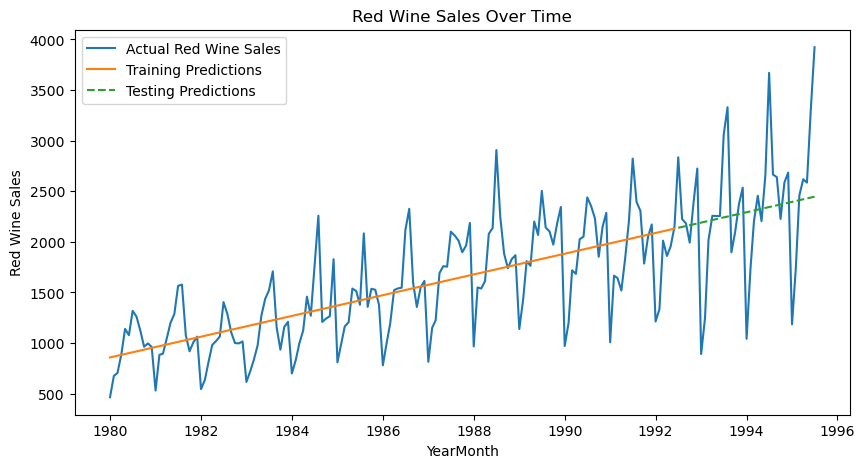

In [155]:
plt.figure(figsize=(10,5))
plt.plot(df['YearMonth'], y, label='Actual Red Wine Sales')
plt.plot(df['YearMonth'][:150], y_train_pred2, label='Training Predictions')
plt.plot(df['YearMonth'][150:], y_test_pred2, '--', label='Testing Predictions')
plt.xlabel('YearMonth')
plt.ylabel('Red Wine Sales')
plt.title('Red Wine Sales Over Time')
plt.legend()
plt.show()

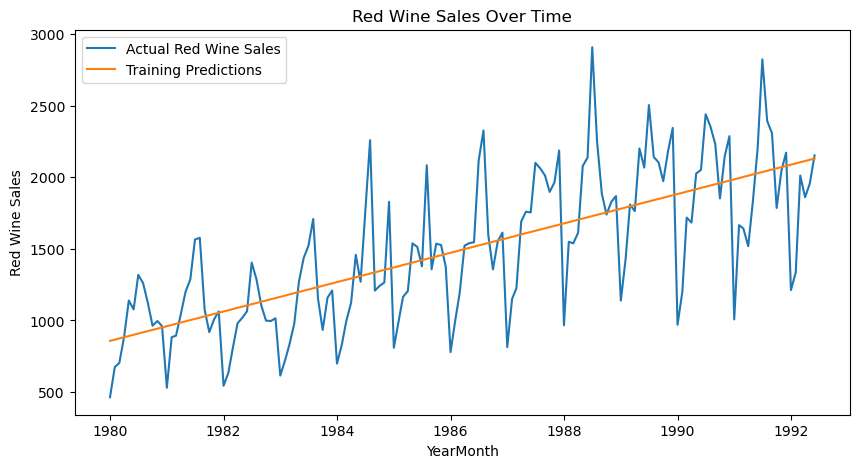

In [116]:
plt.figure(figsize=(10,5))
plt.plot(df['YearMonth'][:150], y[:150], label='Actual Red Wine Sales')
plt.plot(df['YearMonth'][:150], y_train_pred2, label='Training Predictions')
plt.xlabel('YearMonth')
plt.ylabel('Red Wine Sales')
plt.title('Red Wine Sales Over Time')
plt.legend()
plt.show()

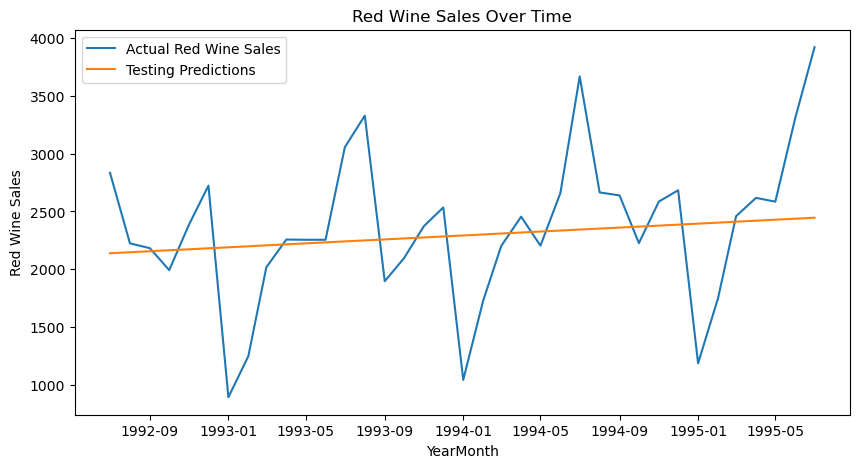

In [117]:
plt.figure(figsize=(10,5))
plt.plot(df['YearMonth'][150:], y[150:], label='Actual Red Wine Sales')
plt.plot(df['YearMonth'][150:], y_test_pred2, label='Testing Predictions')
plt.xlabel('YearMonth')
plt.ylabel('Red Wine Sales')
plt.title('Red Wine Sales Over Time')
plt.legend()
plt.show()

Both the training and the testing models correctly predict the trend of the data, but fall short in the seasonality of the data. There are large peaks and valleys in the data that the linear model does not predict. This model would be okay for a yearly general trend, this model should not be used for accurate sales performance. The training MSE has a much larger MSE, this could be due to the larger amount of data used on the model, which includes more deviations from the seasonality that the testing data did not pick up.

In [118]:
df.head(2)

,YearMonth,Red,Sparkling,Sweetwhite,months_after
0,1980-01-01,464,1686,85,0
1,1980-02-01,675,1591,89,1


In [126]:
# Add years after 1980
filtered_df = df[df['YearMonth'] > '1980-12-31']

filtered_df['Month'] = filtered_df['YearMonth'].dt.month
filtered_df['Year'] = filtered_df['YearMonth'].dt.year

month_dummies = pd.get_dummies(filtered_df['Month'], prefix='Month').astype(int)

dummy_df = pd.concat([filtered_df, month_dummies], axis=1)

dummy_df.head(2)

/tmp/ipykernel_562/663718521.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Month'] = filtered_df['YearMonth'].dt.month
/tmp/ipykernel_562/663718521.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Year'] = filtered_df['YearMonth'].dt.year


,YearMonth,Red,Sparkling,Sweetwhite,months_after,Month,Year,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
12,1981-01-01,530,1530,150,12,1,1981,1,0,0,0,0,0,0,0,0,0,0,0
13,1981-02-01,883,1523,132,13,2,1981,0,1,0,0,0,0,0,0,0,0,0,0


In [139]:
X_prep = dummy_df.drop(columns = ['Red','YearMonth'])

In [144]:
X3 = X_prep
y3 = dummy_df['Red']

X_tr3, y_tr3, X_te3, y_te3 = X3[:150], y3[:150], X3[150:], y3[150:]

lin_model3 = LinearRegression()
lin_model3.fit(X_tr3, y_tr3)

y_train_pred3 = lin_model3.predict(X_tr3)
y_test_pred3 = lin_model3.predict(X_te3)

mse_train3 = mean_squared_error(y_tr3, y_train_pred3)
mse_test3 = mean_squared_error(y_te3, y_test_pred3)

print(f'Training MSE: {mse_train3:.2f} Testing MSE: {mse_test3:.2f}')

Training MSE: 25871.06 Testing MSE: 161507.39


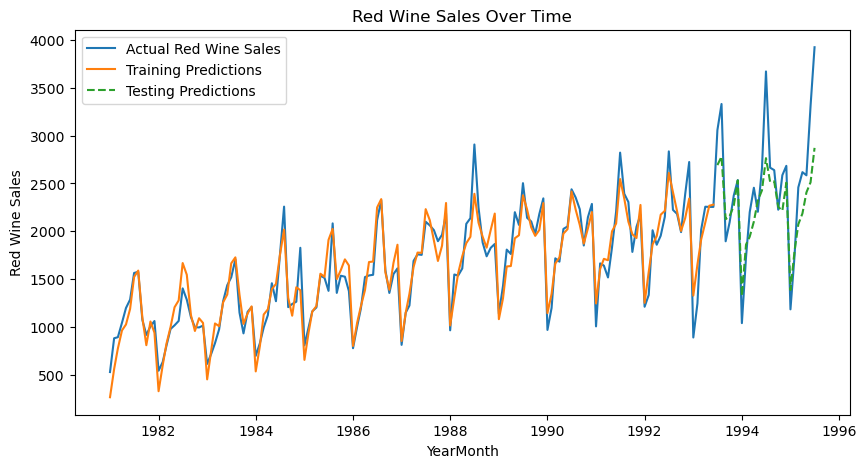

<Figure size 640x480 with 0 Axes>

In [157]:
plt.figure(figsize=(10,5))
plt.plot(dummy_df['YearMonth'], y3, label='Actual Red Wine Sales')
plt.plot(dummy_df['YearMonth'][:150], y_train_pred3, label='Training Predictions')
plt.plot(dummy_df['YearMonth'][150:], y_test_pred3, '--', label='Testing Predictions')
plt.xlabel('YearMonth')
plt.ylabel('Red Wine Sales')
plt.title('Red Wine Sales Over Time')
plt.legend()
plt.figure()
plt.show()

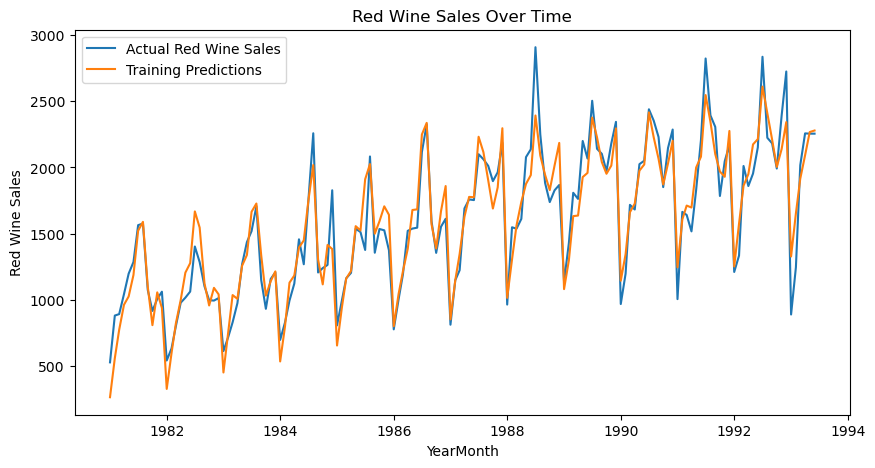

<Figure size 640x480 with 0 Axes>

In [150]:
plt.figure(figsize=(10,5))
plt.plot(dummy_df['YearMonth'][:150], y3[:150], label='Actual Red Wine Sales')
plt.plot(dummy_df['YearMonth'][:150], y_train_pred3, label='Training Predictions')
plt.xlabel('YearMonth')
plt.ylabel('Red Wine Sales')
plt.title('Red Wine Sales Over Time')
plt.legend()
plt.figure()
plt.show()

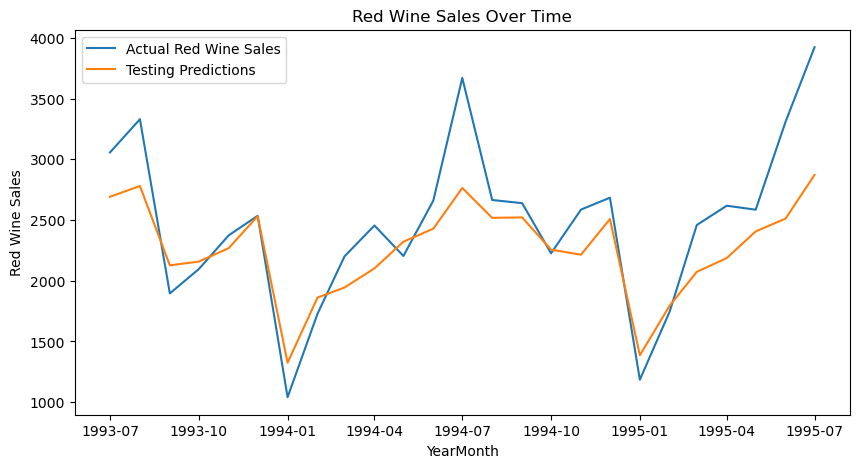

In [151]:
plt.figure(figsize=(10,5))
plt.plot(dummy_df['YearMonth'][150:], y3[150:], label='Actual Red Wine Sales')
plt.plot(dummy_df['YearMonth'][150:], y_test_pred3, label='Testing Predictions')
plt.xlabel('YearMonth')
plt.ylabel('Red Wine Sales')
plt.title('Red Wine Sales Over Time')
plt.legend()
plt.show()

The model's performance seen in the plot of actual and predicted red wine sales, demonstrates a low bias fit on both the training and testing data. Given that we want to use this model to predict future trends, forecast, this model is not one I would reccomend as a high bias model may lead to very high variance given other datasets. High variance would not allow us to predict accurately on future trends. This can been seen in the testing data where high peaks are never accounted for in the model.

The inclusion of "Year" and "Month" features allows the model to account for the strong seasonal component in the data. The consistent oscillations in the predictions align with the seasonal patterns in the actual sales, and the upward trend over time is also accurately reflected. Hoever, this accomodation for the seasonality can also be taken as overfitting, as discussed previously. 

Linear regression serves as a good baseline, it captures the trend and seasonality. However, it may struggle with more complex patterns or changes in seasonality over time.